## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

In this project, I worked to understand the results of an A/B test run by an e-commerce website in order to help the company decide if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision. 

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# load packages 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# set seed
random.seed(42)

# suppress warnings 
warnings.simplefilter('ignore')

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print('There are {} rows in the dataset.'.format(df.shape[0]))

There are 294478 rows in the dataset.


c. The number of unique users in the dataset.

In [4]:
print('There are {} unique users in the dataset.'.format(df['user_id'].nunique()))

There are 290584 unique users in the dataset.


d. The proportion of users converted.

In [5]:
total_converted = df['converted'].sum()/df.shape[0]
print('{} of all users were converted.'.format(round(total_converted, 4)))

0.1197 of all users were converted.


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
no_match = df.loc[(df['landing_page'] == 'new_page') & (df['group'] == 'control')]['user_id'].count() + df.loc[(df['landing_page'] == 'old_page') & (df['group'] == 'treatment')]['user_id'].count()
print('"new_page" and "treatment" do no match {} times.'.format(no_match))

"new_page" and "treatment" do no match 3893 times.


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


After examining the dataframe using .info(), I see that no rows have missing values. 

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.loc[~((df['landing_page'] == 'new_page') == (df['group'] == 'control')),:]

In [9]:
df2 = df.loc[~((df['landing_page'] == 'old_page') == (df['group'] == 'treatment')), :]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
uni_users = df2['user_id'].nunique()
print('There are a total of {} unique users in df2.'.format(uni_users))

There are a total of 290584 unique users in df2.


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(subset = 'user_id') == True]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2.loc[df2.duplicated(subset = 'user_id') == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.loc[~(df2.duplicated(subset = 'user_id') == True), :]

In [15]:
# confirm that the duplicate has been removed; should return "True"
df2.shape[0] == df2['user_id'].nunique()

True

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [53]:
total_conv = df2['converted'].sum() / df2.shape[0]
print('The probability of an individual converting regardless of the landing page they receive is {}.'.format(round(total_conv, 4)))

The probability of an individual converting regardless of the landing page they receive is 0.1196.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
p_old = df2.groupby('group')['converted'].sum()[0] / df2.groupby('group')['converted'].count()[0]
print('The probability that an individual within the control group converted is {}.'.format(round(p_old, 4)))

The probability that an individual within the control group converted is 0.1204.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
p_new = df2.groupby('group')['converted'].sum()[1] / df2.groupby('group')['converted'].count()[1]
print('The probability that an individual within the treatment group converted is {}.'.format(round(p_new, 4)))

The probability that an individual within the treatment group converted is 0.1188.


d. What is the probability that an individual received the new page?

In [54]:
prob_page = df2.groupby('landing_page')['user_id'].count()[0] / (df2.groupby('landing_page')['user_id'].count()[0] + df2.groupby('landing_page')['user_id'].count()[1])
print('The probability that an individual received the new landing page is {}.'.format(round(prob_page, 4)))

The probability that an individual received the new landing page is 0.5001.


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

It appears that the new landing page does not lead to more conversions than the old landing page, given that the probability an individual within the treatment group converted is lower than an individual within the control group. However, without using confidence intervals or p-value, there is not enough statistical evidence to conclude that the new treatment page does or does not lead to more conversions. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} \geq p_{new}$$
$$H_1: p_{old}< p_{new}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
null_new_conv = df2['converted'].sum() / df2.shape[0]
print('Under the null, the conversion rate for p_new is {}.'.format(round(null_new_conv, 4)))

Under the null, the conversion rate for p_new is 0.1196.


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
null_old_conv = df2['converted'].sum() / df2.shape[0]
print('Under the null, the conversion rate for p_old is {}.'.format(round(null_old_conv, 4)))

Under the null, the conversion rate for p_old is 0.1196.


c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.groupby('group')['user_id'].count()[1]
print('There are {} individuals in the treatment group.'.format(n_new))

There are 145310 individuals in the treatment group.


d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.groupby('group')['user_id'].count()[0]
print('There are {} individuals in the control group.'.format(n_old))

There are 145274 individuals in the control group.


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1, null_new_conv, n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1, null_old_conv, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [55]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
print('The difference between the conversion rates for the new landing page and old landing page using the simulated values is {}.'.format(round(p_diff, 4)))

The difference between the conversion rates for the new landing page and old landing page using the simulated values is 0.001.


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []

for _ in range(10000): 
    new_page_converted = np.random.binomial(1, null_new_conv, n_new)
    old_page_converted = np.random.binomial(1, null_old_conv, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

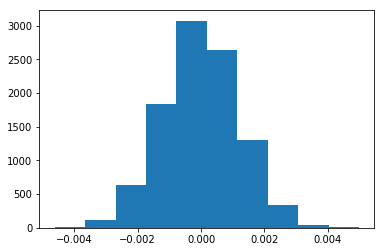

In [28]:
plt.hist(p_diffs);

As expected given the size of my dataset, the sampling distribution of p_diffs, or distribution of the statistic, follows a normal distribution (Lesson 10 Part 17). 

In order to determine if this difference between the old and new landing page conversion rates is significant and not just due to chance, I will simulate draws from the null hypothesis using the standard distribution and size of p_diffs in order to plot a second histogram and calculate the p-value. In this second histogram, shown below, the red line represents the actual observed conversion rate difference in my dataset.

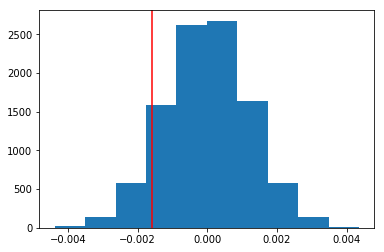

In [29]:
# convert list to array
p_diffs = np.asarray(p_diffs)

# calculate actual observed difference
obs_diff = p_new - p_old

# plot distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red'); 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# calculate p-value
p_val = (null_vals > obs_diff).mean()
print('{} of p_diffs are greater than the actual difference observed in ab_data.csv.'.format(round(p_val, 4)))

0.904 of p_diffs are greater than the actual difference observed in ab_data.csv.


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The proportion of **p_diffs** greater than the actual difference observed in **ab_data.csv** represents what is known as the p-value, defined as "the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true" (Lesson 12 Part 20). Given a p-value of approximately 0.90, which is greater than the acceptable Type 1 error rate ($\alpha$) of 0.05, this test fails to reject the null hypothesis that there is no difference between the conversion rate of the new and old landing pages. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.groupby('landing_page')['converted'].sum()[1]
convert_new = df2.groupby('landing_page')['converted'].sum()[0]
n_old = n_old
n_new = n_new

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

In [33]:
print('The z-score is {}.'.format(round(z_score, 4)))

The z-score is -1.3109.


In [34]:
print('The p-value is {}.'.format(round(p_value, 4)))

The p-value is 0.9051.


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score of -1.3109 represents the number of standard deviations the value of the statistic (in this case, the observed difference between the new page and old page conversion rates) is from the mean. It tells me that the observed difference lies approximately 1.31 standard deviations below the mean. In order to draw further conclusions, I will first find the standard deviation of the p_diffs array and calculate the value when multiplied by the z-score. 

In [35]:
# standard deviation of p_diffs
p_diffs.std()

# multiplied by -1.31
p_diffs.std() * -1.31

-0.0015729113686654898

This value of -0.00157, the standard deviation of p_diffs multiplied by -1.31, nearly exactly matches the observed difference I calculated above, represented by the variable "obs_diff" (0.00158) and shown in the red line of the second histogram. Similarly, the p-value of 0.9051 is also nearly identical to the p-value calculated in part j (0.9065). 

Taken together, the z-score and p-value calculated using the z-test further substantiate my previous findings.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I will need to use a logistic regression model, which is used to predict only two possible outcomes - in this case, conversion or no conversion (Lesson 16 Part 1). 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# add intercept 
df2['intercept'] = 1 

# create dummy variable column 
df2[['to_drop', 'ab_page']] = pd.get_dummies(df2['group'])

# drop extra column 
df2 = df2.drop('to_drop', axis=1)

# check results 
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
# create model 
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

# fit model 
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-13 19:18 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

The p-value associated with the variable ab_page is 0.1899. The reason why the p-value has changed is due to the null and alternative hypotheses of the regression model. In Part II, my hypotheses were expressed as: 

$$H_0: p_{old} \geq p_{new}$$
$$H_1: p_{old}< p_{new}$$

For the logistic regression model, however, the null and alternative hypotheses are expressed as: 

$$H_{0}: b_{i} = 0$$
$$H_{1}: b_{i} \neq 0$$

The null hypothesis states that the slope of the line equals zero, which implies that no relationship exists between the response (dependent) variable, the conversion rate, and the explanatory (independent) variable, the old and new landing pages. The alternative hypothesis asserts that the slope does not equal zero, which indicates that there is a relationship between the two variables (Lesson 14 Part 16).

The p-value of this logistic regression model, therefore, tells me whether or not the type of landing page (old or new) was significant in predicting if a user will convert or not (Lesson 16 Part 6). Because the p-value of 0.1899 > $\alpha$ of 0.05, I fail to reject the null hypothesis that the slope of the line equals zero. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

There are lots of other factors that may influence whether or not an individual converts - for example, users who have previously visited the old landing page may experience either change aversion or a novelty effect if they are introduced to a new landing page, especially if the changes are more dramatic (Lesson 13 Part 2). The amount of time a user spends on the landing page may also impact the conversion rate. Adding these additional factors (user type, duration) will provide a deeper understanding as to what may drive conversion rates and help avoid making unnecessary and potentially costly changes. However, by introducing additional terms, a variety of potential problems may arise (Lesson 15 Part 15). These include: 
+ non-linear relationship 
+ correlated errors 
+ non-constant variance 
+ outliers 
+ multicollinearity

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
# load dataset 
df3 = pd.read_csv('countries.csv')

# merge with df2 
df4 = pd.merge(df2, df3[['user_id', 'country']], how='left', on='user_id') 

# check for missing values 
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 8 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
country         290584 non-null object
dtypes: int64(3), object(4), uint8(1)
memory usage: 18.0+ MB


In [40]:
# create dummy variable columns
df4[['CA', 'UK', 'US']] = pd.get_dummies(df4['country'])

# drop extra column 
df4 = df4.drop('US', axis=1)

# check results 
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0


In [41]:
# create model 
log_mod2 = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'CA', 'UK']])

# fit model 
results2 = log_mod2.fit()

# view results
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-13 19:18 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

To interpret the results, I will first need to exponentiate each variable in order to transform the logistic regression slopes into odds ratios.  

In [42]:
# ab_page
np.exp(-0.0149)

0.9852104557227469

In [43]:
# CA
np.exp(-0.0408)

0.96002111497165088

In [44]:
# UK 
np.exp(0.0099)

1.0099491671175422

From these results, I learn the following (ceteris paribus): 
+ The odds of converting when a user receives the new landing page is **0.9852 times** the odds of converting when a user receives the old landing page. This can also be expressed as the percent change, with the odds of converting when a user receives the new landing page **1.48 percent lower** than the odds of converting when a user receives the old landing page. 
+ The odds of converting when a user lives in Canada is **0.9600 times** the odds of converting when a user lives in the U.S. Put differently, the odds of converting when a user lives in Canada is **4.00 percent lower** than the odds of converting when a user lives in the U.S. 
+ The odds of converting when a user lives in the U.K. is **1.0100 times** the odds of converting when a user lives in the U.S. Expressed another way, the odds of converting when a user lives in the U.K. are **1.00 percent higher** than the odds of converting when a user lives in the U.S. 

Given the high p-values, however, **none of these conclusions are statistically significant** with an  𝛼  of 0.05 and I fail to reject the null hypothesis that $b_{ab-page} = b_{CA} = b_{UK} = 0$. Therefore, the probability of a user converting does not depend on the landing page type (new or old) or user country (Canada, U.K., or U.S.).

Source: James, G., Witten, D., Hastie, T. and Tibshirani, R. (2017) *An Introduction to Statistical Learning with Applications in R* 7th edn. New York, USA: Springer Science + Business Media. Available at: http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf (Accessed 13 April 2020). 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
# create interaction columns
df4['pg_CA'] = df4['ab_page'] * df4['CA']
df4['pg_UK'] = df4['ab_page'] * df4['UK']

# create model 
log_mod3 = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'CA', 'UK', 'pg_CA', 'pg_UK']])

# fit model 
results3 = log_mod3.fit()

# view results
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-13 19:18 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
pg_CA        -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
pg_UK         0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

Again, I will now exponentiate the variables in order to interpret the results. 

In [46]:
# intercept 
np.exp(-1.9865)

0.13717469767172208

In [47]:
# ab_page
np.exp(-0.0206)

0.97961073050325054

In [48]:
# CA
np.exp(-0.0175)

0.9826522356650732

In [49]:
# UK 
np.exp(-0.0057)

0.99431621417843319

In [50]:
# pg_CA
np.exp(-0.0469)

0.95418281110072622

In [51]:
# pg_UK 
np.exp(0.0314)

1.0318981806179213

From these results, I can conclude (ceteris paribus): 
+ The odds of converting when a user receives the old landing page and resides in the U.S. is **0.1372.**
+ The odds of converting when a user receives the new landing page and resides in the U.S. is **0.1344 times or 86.56 percent lower** than the odds of converting when a user receives the old landing page and resides in the U.S.
+ The odds of converting when a user receives the old landing page and resides in Canada is **0.1348 times or 86.52 percent lower** than the odds of converting when a user receives the old landing page but resides in the U.S.
+ The odds of converting when a user receives the old landing page and resides in the U.K. is **0.1364 times or 86.36 percent lower** than the odds of converting when a user receives the old landing page but resides in the U.S. 
+ The odds ratio of converting when a user receives the new landing page will increase by a **factor of 0.9347** when the user lives in Canada than in the U.S. Said another way, the odds ratio will **decrease by 6.53 percent.**  
+ The odds ratio of converting when a user receives the new landing page will increase by a **factor of 1.0108** when the user lives in the U.K. than in the U.S. Expressed differently, the odds ratio will **increase by 1.08 percent.**   


Once again, however, the high p-values indictate that **none of these conclusions are statistically significant** at  𝛼  = 0.05 and I once again fail to reject the null hypothesis that $b_{ab-page} = b_{CA} = b_{UK} = b_{ab-page * CA} = b_{ab-page * UK} = 0$. Thus, the probability of a user converting does not depend on the landing page type (new or old), user country (Canada, U.K., or U.S.), or the interaction of these variables.

Sources: https://stats.stackexchange.com/questions/57031/interpreting-interaction-terms-in-logit-regression-with-categorical-variables and https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1447969/.

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0